In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
import datetime as dt
import pprint as pp
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
X = np.load("./X.npy")
y = np.load("./y.npy")
y = y[:-1]
X = X[:-1]
X_avg = np.zeros((681,22))

y = y - np.mean(X[:,-5:len(X[:,0])],axis=1)
for i in range(22):
    X_avg[:,i] = np.mean(X[:,5*i:5+5*i],axis =1)
    
scaler = StandardScaler()

X = scaler.fit_transform(X,y)

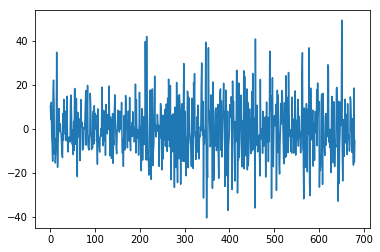

681


In [4]:
plt.plot(list(range(0,len(y))),y)
plt.show()
print(len(y))

In [5]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0,n_estimators=1000,criterion = 'mae',n_jobs =8,max_features=0.14)
train_split = 2/3
train_n = int(len(y)*train_split)
regr.fit(X[:train_n],y[:train_n])

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=5,
           max_features=0.14, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=8,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

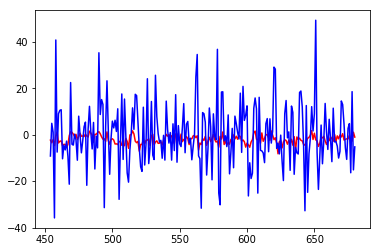

0.028926381834752934


In [31]:
plt.plot(list(range(train_n,len(y))),regr.predict(X[train_n:]),'r')
plt.plot(list(range(train_n,len(y))),y[train_n:],'b')
plt.show()
print(regr.score(X[train_n:],y[train_n:]))

In [ ]:
 def brute_rfr(X,y):
    
    